In [7]:
import tarfile
import os
import shutil

import glob
import numpy as np 

- file download

In [15]:
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar

^C


In [11]:
TARGET_PATH = "Images"
# if os.path.exists(TARGET_PATH):
#     shutil.rmtree(TARGET_PATH)

- zip extract

In [10]:
fname = 'images.tar'
tar = tarfile.open(fname, "r:tar")
tar.extractall()
tar.close()

In [17]:
len(os.listdir(TARGET_PATH))

120

- 이름 편하게 변경

In [18]:
for dir_name in os.listdir(TARGET_PATH):
    dst = os.path.join(TARGET_PATH,dir_name)
    dir_ = dir_name.split('-')[1].lower()
    target = os.path.join(TARGET_PATH,dir_)
    os.rename(dst, target)

- Dataset 만들기(array) - data, label 나누기

In [24]:
dataset = []
for filepath in glob.iglob(f'{TARGET_PATH}/**/*.jpg',recursive=True):
    breed_name = filepath.split('\\')[1]
    dataset.append([filepath, breed_name])
dataset = np.array(dataset)


array([['Images\\affenpinscher\\n02110627_10147.jpg', 'affenpinscher'],
       ['Images\\affenpinscher\\n02110627_10185.jpg', 'affenpinscher'],
       ['Images\\affenpinscher\\n02110627_10225.jpg', 'affenpinscher'],
       ...,
       ['Images\\yorkshire_terrier\\n02094433_962.jpg',
        'yorkshire_terrier'],
       ['Images\\yorkshire_terrier\\n02094433_967.jpg',
        'yorkshire_terrier'],
       ['Images\\yorkshire_terrier\\n02094433_9739.jpg',
        'yorkshire_terrier']], dtype='<U57')

In [23]:
next(glob.iglob(f'{TARGET_PATH}/**/*.jpg',recursive=True))

'Images\\affenpinscher\\n02110627_10147.jpg'

- Dataset 가공(train, test)

In [70]:
from sklearn.model_selection import train_test_split
train_image, test_image, train_label, test_label= train_test_split(dataset[:,0],dataset[:,1],train_size=0.8,test_size=0.2, stratify=dataset[:,1])

In [53]:
len(train_image)

16464

In [38]:
hello = x_train[:]

- Kfold

In [42]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(hello)
list(kf.split(hello))

[(array([ 3087,  3088,  3089, ..., 15432, 15433, 15434]),
  array([   0,    1,    2, ..., 3084, 3085, 3086])),
 (array([    0,     1,     2, ..., 15432, 15433, 15434]),
  array([3087, 3088, 3089, ..., 6171, 6172, 6173])),
 (array([    0,     1,     2, ..., 15432, 15433, 15434]),
  array([6174, 6175, 6176, ..., 9258, 9259, 9260])),
 (array([    0,     1,     2, ..., 15432, 15433, 15434]),
  array([ 9261,  9262,  9263, ..., 12345, 12346, 12347])),
 (array([    0,     1,     2, ..., 12345, 12346, 12347]),
  array([12348, 12349, 12350, ..., 15432, 15433, 15434]))]

- check

In [71]:
import pandas as pd
(pd.Series(test_label).value_counts() / len(test_label)).head(10)

maltese_dog             0.012148
afghan_hound            0.011662
scottish_deerhound      0.011176
samoyed                 0.010690
pomeranian              0.010690
irish_wolfhound         0.010690
bernese_mountain_dog    0.010690
great_pyrenees          0.010447
shih                    0.010447
basenji                 0.010204
dtype: float64

In [72]:
(pd.Series(train_label).value_counts() / len(train_label)).head(10)

maltese_dog             0.012269
afghan_hound            0.011601
scottish_deerhound      0.011297
pomeranian              0.010629
bernese_mountain_dog    0.010569
irish_wolfhound         0.010569
samoyed                 0.010569
shih                    0.010386
great_pyrenees          0.010326
leonberg                0.010204
dtype: float64

- dataset train, test 폴더생성

In [86]:
DATA_PATH = 'dataset'
if not os.path.exists(DATA_PATH):
    os.mkdir(DATA_PATH)
    os.makedirs(os.path.join(DATA_PATH, 'train'))
    os.makedirs(os.path.join(DATA_PATH, 'test'))
    
    for breed_name in set(test_label):
        os.makedirs(os.path.join(DATA_PATH, 'train', breed_name))
        os.makedirs(os.path.join(DATA_PATH, 'test', breed_name))

In [87]:
import shutil
for filepath, label_dir in zip(train_image.tolist(), train_label.tolist()):
    filename = filepath.split("\\")[-1]
    source_path = filepath
    target_dir = os.path.join(DATA_PATH,'train',label_dir,filename)
    shutil.copy(source_path, target_dir)

In [88]:
for filepath, label_dir in zip(test_image.tolist(), test_label.tolist()):
    filename = filepath.split("\\")[-1]
    source_path = filepath
    target_dir = os.path.join(DATA_PATH,'test',label_dir,filename)
    shutil.copy(source_path, target_dir)

- 이미지 출력

In [90]:
from PIL import Image

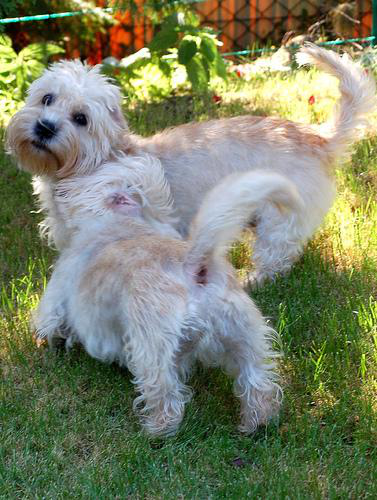

In [92]:
im = Image.open(target_dir)
im

In [96]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

['pembroke' 'airedale' 'afghan_hound' 'border_terrier' 'collie'
 'bedlington_terrier' 'cairn' 'french_bulldog' 'english_springer'
 'eskimo_dog']


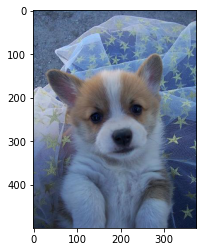

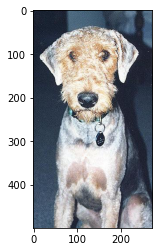

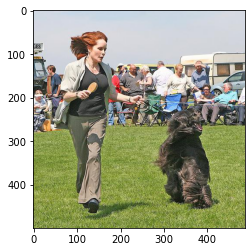

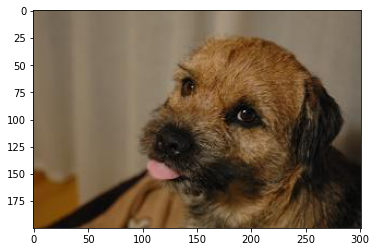

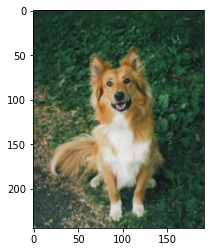

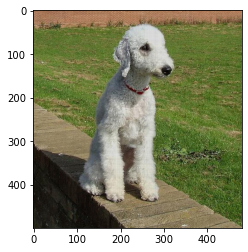

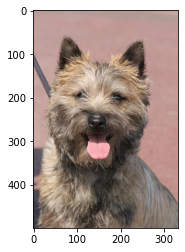

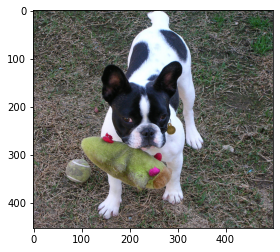

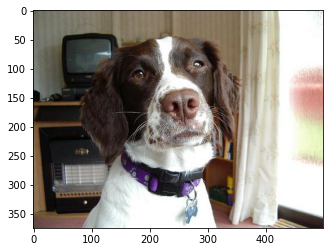

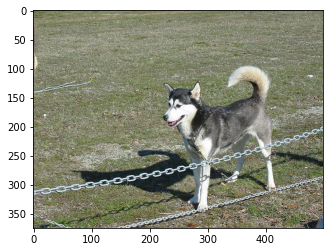

In [97]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def process(filename: str=None) -> None:
    image = mpimg.imread(filename)
    plt.figure()
    plt.imshow(image)

idx = np.random.choice(len(dataset),10)

images = dataset[:,0][idx]

for file in images:
    process(file)
    
print(dataset[:,1][idx])

In [ ]:
TARGET_PATH = 'Images'
if os.path.exists(TARGET_PATH):
    